In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x_train = np.genfromtxt("data/x_train.csv", delimiter=",", skip_header=1)
features = np.genfromtxt("data/x_train.csv", delimiter=",", dtype=str, max_rows=1)
y_train = np.genfromtxt("data/y_train.csv", delimiter=",", skip_header=1, usecols=1)
y_features = np.genfromtxt("data/y_train.csv", delimiter=",", dtype=str, max_rows=1)

In [5]:
x_test = np.genfromtxt("data/x_test.csv",delimiter=",", skip_header=1)

In [6]:
def to_categorical(array, range_min, range_max, n_bins):
    # Filter array to include only values within the specified range
    filtered_values = array[(array >= range_min) & (array <= range_max)]
    
    # Calculate the bin edges using quantiles
    bin_edges = np.quantile(filtered_values, np.linspace(0, 1, n_bins + 1))
    
    def assign_bin(value):
        # Check if the value is NaN
        if np.isnan(value):
            return -1
        
        # Handle special values like 88 and 999
        if value == 88 or value == 999:
            return -1
        
        # If the value is outside the range, return it as is
        if value < range_min or value > range_max:
            return value
        
        # Assign bin based on which range the value falls into
        # We use right=True to ensure that values exactly equal to range_max are included in the last bin
        return np.digitize(value, bin_edges, right=True)
    
    return assign_bin

mapping_dict = {
    "GENHLTH": lambda value: value if value <= 9 else -1,
    "PHYSHLTH": to_categorical(array=x_train[:, features=="PHYSHLTH"].flatten(), range_min=0, range_max=30, n_bins=4),
    "MENTHLTH": to_categorical(array=x_train[:, features=="MENTHLTH"].flatten(), range_min=0, range_max=30, n_bins=4),
    "POORHLTH": to_categorical(array=x_train[:, features=="POORHLTH"].flatten(), range_min=0, range_max=30, n_bins=4),
    "HLTHPLN1": lambda value: value if not np.isnan(value) else -1,
    "MEDCOST": lambda value: value if value <= 7 else -1,
    "CHECKUP1": lambda value: value if value <= 8 else -1,
    "BPHIGH4": lambda value: value if value <= 7 else -1,
    "BPMEDS": lambda value: value if not np.isnan(value) else -1,
    "BLOODCHO": lambda value: value if not np.isnan(value) else -1,
    "CHOLCHK": lambda value: value if not np.isnan(value) else -1,
    # "CVDINFR4": lambda value: 1 if value == 1 else 0,
    # "CVDCRHD4": lambda value: 1 if value == 1 else 0,
    "TOLDHI2": lambda value: value if not np.isnan(value) else -1,
    "CVDSTRK3": lambda value: value if not np.isnan(value) else -1,
    "ASTHMA3": lambda value: value if not np.isnan(value) else -1,
    "ASTHNOW": lambda value: value if not np.isnan(value) else -1,
    "CHCSCNCR": lambda value: value if not np.isnan(value) else -1,
    "CHCOCNCR": lambda value: value if not np.isnan(value) else -1,
    "CHCCOPD1": lambda value: value if not np.isnan(value) else -1,
    "HAVARTH3": lambda value: value if not np.isnan(value) else -1,
    "ADDEPEV2": lambda value: value if not np.isnan(value) else -1,
    "CHCKIDNY": lambda value: value if not np.isnan(value) else -1,
    "DIABETE3": lambda value: value if not np.isnan(value) else -1,
    "SEX": lambda value: value if not np.isnan(value) else -1,
    "MARITAL": lambda value: value if not np.isnan(value) else -1,
    "EDUCA": lambda value: value if not np.isnan(value) else -1,
    "VETERAN3": lambda value: value if not np.isnan(value) else -1,
    "INCOME2": lambda value: value if not np.isnan(value) else -1,
    "INTERNET": lambda value : value if not np.isnan(value) else -1,
    "WTKG3": to_categorical(array=x_train[:, features=="WTKG3"].flatten(), range_min=23, range_max=295, n_bins=6),
    "QLACTLM2": lambda value : value if not np.isnan(value) else -1,
    "USEEQUIP": lambda value : value if not np.isnan(value) else -1,
    "BLIND": lambda value : value if not np.isnan(value) else -1,
    "DECIDE": lambda value : value if not np.isnan(value) else -1,
    "DIFFWALK": lambda value : value if not np.isnan(value) else -1,
    "DIFFDRES": lambda value : value if not np.isnan(value) else -1,
    "DIFFALON": lambda value : value if not np.isnan(value) else -1,
    "SMOKE100": lambda value : value if not np.isnan(value) else -1,
    "SMOKDAY2": lambda value : value if not np.isnan(value) else -1,
    "LASTSMK2": lambda value : value if not np.isnan(value) else -1,
    "USENOW3": lambda value : value if not np.isnan(value) else -1,
    "AVEDRNK2": to_categorical(array=x_train[:, features=="AVEDRNK2"].flatten(), range_min=1, range_max=76, n_bins=5),
    "DRNK3GE5": to_categorical(array=x_train[:, features=="DRNK3GE5"].flatten(), range_min=1, range_max=76, n_bins=5),
    "EXERANY2": lambda value : value if not np.isnan(value) else -1,
    # "EXERHMM1": lambda value: str(value//200) if value <= 959 and value not in [777,999] else -1,
    "LMTJOIN3": lambda value : value if not np.isnan(value) else -1,
    "FLUSHOT6": lambda value : value if not np.isnan(value) else -1,
    "PDIABTST": lambda value : value if not np.isnan(value) else -1,
    "PREDIAB1": lambda value : value if not np.isnan(value) else -1,
    "INSULIN": lambda value : value if not np.isnan(value) else -1,
    "CIMEMLOS": lambda value : value if not np.isnan(value) else -1,
    "_RFHLTH": lambda value : value if not np.isnan(value) else -1,
    "_HCVU651": lambda value : value if not np.isnan(value) else -1,
    "_RFHYPE5": lambda value : value if not np.isnan(value) else -1,
    "_CHOLCHK": lambda value : value if not np.isnan(value) else -1,
    "_RFCHOL": lambda value : value if not np.isnan(value) else -1,
    # "_MICHD": lambda value: value if value <= 2 else -1,
    "_LTASTH1": lambda value : value if not np.isnan(value) else -1,
    "_CASTHM1": lambda value : value if not np.isnan(value) else -1,
    "_DRDXAR1": lambda value : value if not np.isnan(value) else -1,
    "_AGEG5YR": lambda value : value if not np.isnan(value) else -1,
    "_AGE_G": lambda value : value if not np.isnan(value) else -1,
    "HTM4": to_categorical(array=x_train[:, features=="HTM4"].flatten(), range_min=0.91, range_max=2.44, n_bins=6),
    "_RFBMI5": lambda value : value if not np.isnan(value) else -1,
    "_EDUCAG": lambda value : value if not np.isnan(value) else -1,
    "_SMOKER3": lambda value : value if not np.isnan(value) else -1,
    "_RFBING5": lambda value : value if not np.isnan(value) else -1,
    "_BMI5CAT": lambda value : value if not np.isnan(value) else -1,
    "_RFDRHV5": lambda value : value if not np.isnan(value) else -1,
    "FTJUDA1_": to_categorical(array=x_train[:, features=="FTJUDA1_"].flatten(), range_min=0, range_max=99.99, n_bins=4),
    "MAXVO2_": to_categorical(array=x_train[:, features=="MAXVO2_"].flatten(), range_min=0, range_max=50.1, n_bins=6),
    "ACTIN11_": lambda value : value if not np.isnan(value) else -1,
    "ACTIN21_": lambda value : value if not np.isnan(value) else -1,
    "_PACAT1": lambda value : value if not np.isnan(value) else -1,
    "_PA150R2": lambda value : value if not np.isnan(value) else -1,
    "_PA300R2": lambda value : value if not np.isnan(value) else -1,
    "_PASTRNG":  lambda value : value if not np.isnan(value) else -1,
    "_PASTAE1": lambda value : value if not np.isnan(value) else -1,
    "_LMTACT1": lambda value : value if not np.isnan(value) else -1,
    "_LMTWRK1": lambda value : value if not np.isnan(value) else -1,
    "_LMTSCL1": lambda value : value if not np.isnan(value) else -1,
    "_INCOMG": lambda value : value if not np.isnan(value) else -1,
}

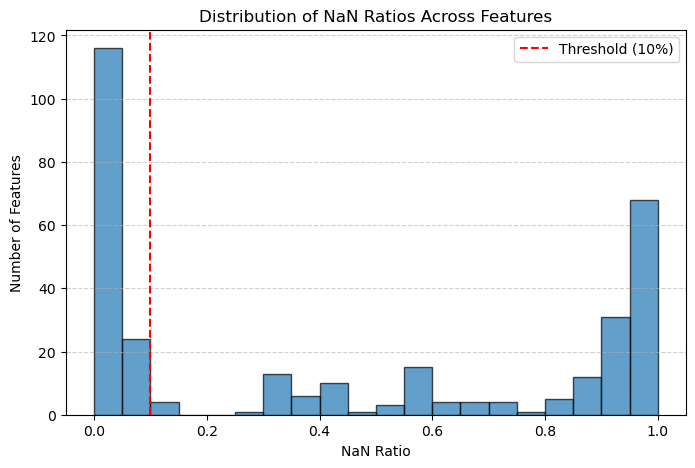

In [7]:
def analyze_missing_value_distribution_with_plot(x_train, features):
    nan_ratios = []

    # Calculate NaN ratio for each feature
    for idx in range(len(features)):
        nan_count = np.sum(np.isnan(x_train[:, idx]))
        nan_ratio = nan_count / x_train.shape[0]
        nan_ratios.append(nan_ratio)
    
    nan_ratios = np.array(nan_ratios)

    # Plotting the distribution of NaN ratios
    plt.figure(figsize=(8, 5))

    # Histogram to visualize the distribution
    plt.hist(nan_ratios, bins=20, edgecolor='k', alpha=0.7)
    plt.xlabel('NaN Ratio')
    plt.ylabel('Number of Features')
    plt.title('Distribution of NaN Ratios Across Features')
    plt.axvline(x=0.1, color='r', linestyle='--', label='Threshold (10%)')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

analyze_missing_value_distribution_with_plot(x_train, features)

In [8]:
def select_features_with_low_nan_ratio(x_train, features, threshold=1):
    nan_ratios = {}
    # Loop over each feature and calculate NaN ratio
    for idx, feature in enumerate(features):
        nan_count = np.sum(np.isnan(x_train[:, idx]))
        nan_ratio = nan_count / len(x_train)
        nan_ratios[feature] = nan_ratio

    # Select features with NaN ratio below the given threshold
    selected_features = [feature for feature, nan_ratio in nan_ratios.items() if nan_ratio < threshold]

    print(f"Selected {len(selected_features)} features over {len(features)}")
    dropped_features = [feature for feature, nan_ratio in nan_ratios.items() if nan_ratio >= threshold]
    print(f"Dropped features with more than {threshold * 100}% NaNs: {dropped_features}")

    return selected_features

# Assuming x_train and features are already available
selected_features = select_features_with_low_nan_ratio(x_train, features)
print(selected_features)

Selected 322 features over 322
Dropped features with more than 100% NaNs: []
['Id', '_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES', 'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1', 'CELLFON2', 'CADULT', 'PVTRESD2', 'CCLGHOUS', 'CSTATE', 'LANDLINE', 'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'DIABAGE2', 'SEX', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3', 'PREGNANT', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'USENOW3', 'ALCDAY5', 'AVEDRNK2', 'DRNK3GE5', 'MAXDRNKS', 'FRUIT

In [9]:
def apply_mapping(x_train, selected_features, mapping_dict):
    x_train_filtered = np.zeros((x_train.shape[0], len(selected_features)))

    # Create a dictionary to map feature names to their column indices in the original dataset
    feature_indices = {feature: idx for idx, feature in enumerate(selected_features)}

    # Iterate over selected features to apply the mapping
    for idx, feature in enumerate(selected_features):
        if feature in mapping_dict:
            transform_function = mapping_dict[feature]
            if callable(transform_function):
                # Extract the feature values from the original x_train for the selected feature
                feature_index = feature_indices[feature]
                feature_values = x_train[:, feature_index]

                # Apply the transformation to each value
                transformed_values = np.array([transform_function(value) for value in feature_values])
                x_train_filtered[:, idx] = transformed_values  
        else:
            print(f"Warning: Feature '{feature}' Skipping.")

    return x_train_filtered

x_train_filtered = apply_mapping(x_train, selected_features, mapping_dict)

#### Point-Biserial Correlation:
A way to evaluate the correlation between your categorical features (treated as continuous) and a binary target. It provides a linear correlation measure that is appropriate for your binary target variable.

In [10]:
def point_biserial_correlation(x, y):
    y_mean_1 = np.mean(x[y == 1])
    y_mean_0 = np.mean(x[y == -1])
    y_std = np.std(x)
    
    p = np.sum(y == 1) / len(y)
    q = 1 - p
    
    correlation = (y_mean_1 - y_mean_0) * np.sqrt(p * q) / y_std if y_std > 0 else 0
    return correlation

def calculate_correlations_point_biserial(x_train, y_train, selected_features):
    correlations = {}

    for idx, feature_name in enumerate(selected_features):
        feature_values = x_train[:, idx]
        correlation = point_biserial_correlation(feature_values, y_train)
        correlations[feature_name] = correlation
        print(f"Correlation between {feature_name} and target: {correlation:.2f}")

    return correlations

y_train = y_train.flatten()
x_train_filtered = np.array(x_train_filtered)

correlations = calculate_correlations_point_biserial(x_train_filtered, y_train, selected_features)


Correlation between Id and target: 0.00
Correlation between _STATE and target: 0.00
Correlation between FMONTH and target: 0.00
Correlation between IDATE and target: 0.00
Correlation between IMONTH and target: 0.00
Correlation between IDAY and target: 0.00
Correlation between IYEAR and target: 0.00
Correlation between DISPCODE and target: 0.00
Correlation between SEQNO and target: 0.00
Correlation between _PSU and target: 0.00
Correlation between CTELENUM and target: 0.00
Correlation between PVTRESD1 and target: 0.00
Correlation between COLGHOUS and target: 0.00
Correlation between STATERES and target: 0.00
Correlation between CELLFON3 and target: 0.00
Correlation between LADULT and target: 0.00
Correlation between NUMADULT and target: 0.00
Correlation between NUMMEN and target: 0.00
Correlation between NUMWOMEN and target: 0.00
Correlation between CTELNUM1 and target: 0.00
Correlation between CELLFON2 and target: 0.00
Correlation between CADULT and target: 0.00
Correlation between PVT

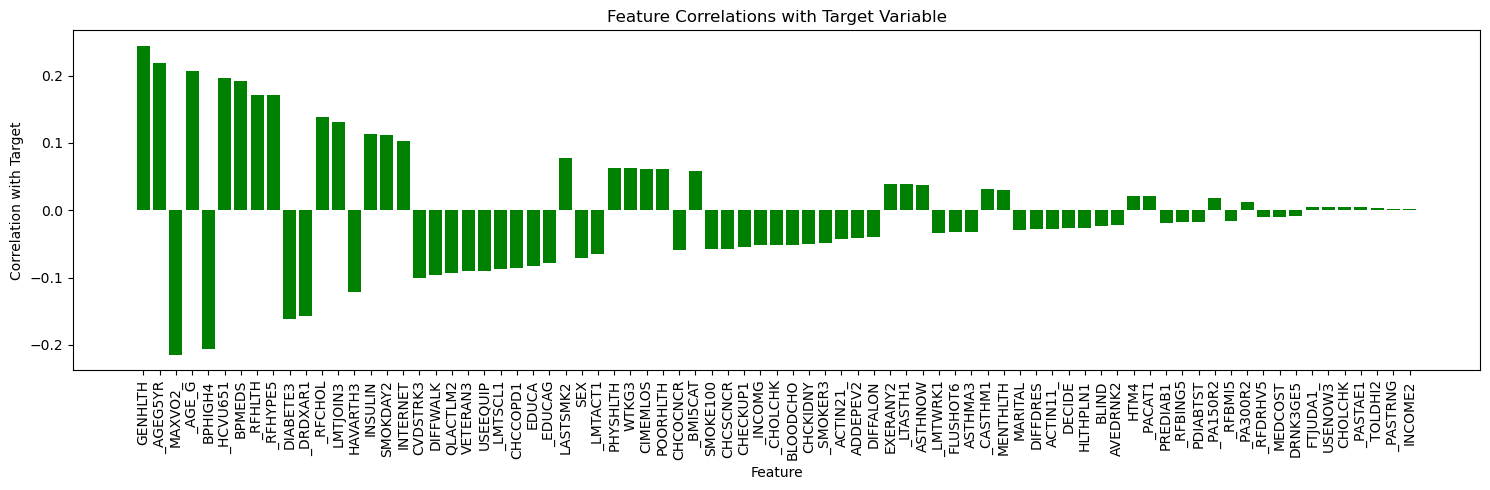

In [11]:
# Filter out features with zero correlation and sort them in decreasing order
filtered_correlations = {feature: corr for feature, corr in correlations.items() if corr != 0}
sorted_correlations = dict(sorted(filtered_correlations.items(), key=lambda item: abs(item[1]), reverse=True))

feature_names = list(sorted_correlations.keys())
correlation_values = list(sorted_correlations.values())
plt.figure(figsize=(15, 5))
plt.bar(feature_names, correlation_values, color='green')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Correlation with Target')
plt.title('Feature Correlations with Target Variable')
plt.tight_layout()
plt.show()


In [158]:
threshold = 0.05
selected_features_final = [feature for feature, corr in correlations.items() if abs(corr) >= threshold]
print(f"Selected features based on threshold of {threshold}: {selected_features_final}")


Selected features based on threshold of 0.05: ['GENHLTH', 'PHYSHLTH', 'POORHLTH', 'CHECKUP1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CVDSTRK3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'CHCKIDNY', 'DIABETE3', 'SEX', 'EDUCA', 'VETERAN3', 'INTERNET', 'QLACTLM2', 'USEEQUIP', 'DIFFWALK', 'SMOKE100', 'SMOKDAY2', 'LASTSMK2', 'LMTJOIN3', 'INSULIN', 'CIMEMLOS', '_RFHLTH', '_HCVU651', '_RFHYPE5', '_CHOLCHK', '_RFCHOL', '_DRDXAR1', '_AGEG5YR', '_AGE_G', 'WTKG3', '_BMI5CAT', '_EDUCAG', '_INCOMG', 'MAXVO2_', '_LMTACT1', '_LMTSCL1']


In [159]:
print(len(selected_features_final))

42


#### Normalized Mutual Information 
This is a non-linear measure that provides insight into how much information about the target can be gained from each feature. It is efficient for categorical data and can give valuable insights.

1. Calculate Entropy for each feature and the target.
2. Calculate Joint Entropy between each feature and the target.
3. Use these values to compute Mutual Information (MI).
4. Calculate the Normalized Mutual Information (NMI).

In [14]:
def calculate_entropy(values):
    unique_values, counts = np.unique(values, return_counts=True)
    probabilities = counts / len(values)
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy

def calculate_joint_entropy(feature_values, target_values):
    unique_pairs, counts = np.unique(list(zip(feature_values, target_values)), axis=0, return_counts=True)
    probabilities = counts / len(feature_values)
    joint_entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return joint_entropy

def calculate_normalized_mutual_information(x_train_filtered, y_train, selected_features):
    nmi_values = []

    # Calculate the entropy of the target variable
    entropy_y = calculate_entropy(y_train)

    # Iterate over each feature in the dataset
    for idx, feature_name in enumerate(selected_features):
        feature_values = x_train_filtered[:, idx]

        # Calculate entropy of the feature
        entropy_feature = calculate_entropy(feature_values)

        # Calculate joint entropy between the feature and the target
        joint_entropy = calculate_joint_entropy(feature_values, y_train)

        # Mutual Information: MI(feature, target) = H(feature) + H(target) - H(feature, target)
        mutual_information = entropy_feature + entropy_y - joint_entropy

        # Normalized Mutual Information: NMI = 2 * MI / (H(feature) + H(target))
        if (entropy_feature + entropy_y) == 0:
            nmi = 0
        else:
            nmi = 2 * mutual_information / (entropy_feature + entropy_y)

        # Append the NMI value to the list
        nmi_values.append(nmi)

    return nmi_values

# Calculate the NMI for all selected features
nmi_values = calculate_normalized_mutual_information(x_train_filtered, y_train, selected_features)

# Print the NMI values for each feature
print(list(zip(selected_features, nmi_values)))


[('Id', 0.0), ('_STATE', 0.0), ('FMONTH', 0.0), ('IDATE', 0.0), ('IMONTH', 0.0), ('IDAY', 0.0), ('IYEAR', 0.0), ('DISPCODE', 0.0), ('SEQNO', 0.0), ('_PSU', 0.0), ('CTELENUM', 0.0), ('PVTRESD1', 0.0), ('COLGHOUS', 0.0), ('STATERES', 0.0), ('CELLFON3', 0.0), ('LADULT', 0.0), ('NUMADULT', 0.0), ('NUMMEN', 0.0), ('NUMWOMEN', 0.0), ('CTELNUM1', 0.0), ('CELLFON2', 0.0), ('CADULT', 0.0), ('PVTRESD2', 0.0), ('CCLGHOUS', 0.0), ('CSTATE', 0.0), ('LANDLINE', 0.0), ('HHADULT', 0.0), ('GENHLTH', 0.034118670925499466), ('PHYSHLTH', 0.017770978299167798), ('MENTHLTH', 0.0030221603567335935), ('POORHLTH', 0.015123024707419028), ('HLTHPLN1', 0.003185139870373865), ('PERSDOC2', 0.0), ('MEDCOST', 0.000714273622114409), ('CHECKUP1', 0.006386783429551598), ('BPHIGH4', 0.04351175953907943), ('BPMEDS', 0.04473806511587297), ('BLOODCHO', 0.013912067907761137), ('CHOLCHK', 0.015983857172958037), ('TOLDHI2', 0.028730190193599008), ('CVDSTRK3', 0.056336495445269384), ('ASTHMA3', 0.0032994945344814093), ('ASTHNOW

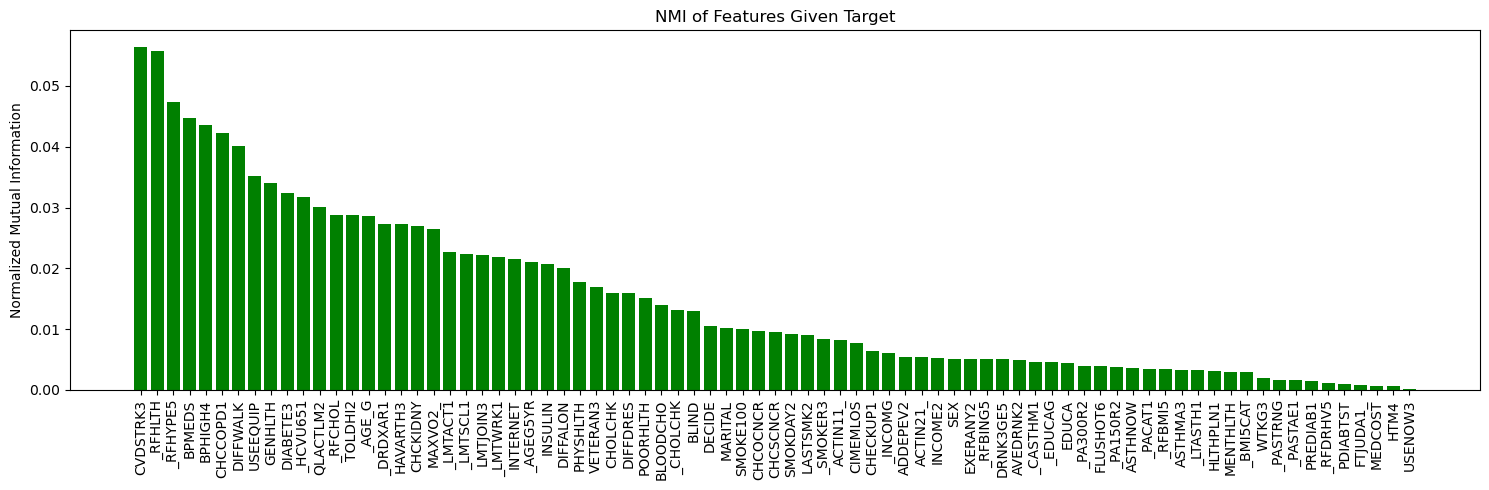

In [15]:
# Filter out non-zero NMI values
non_zero_indices = [i for i, nmi in enumerate(nmi_values) if nmi > 0]
non_zero_features = [selected_features[i] for i in non_zero_indices]
non_zero_nmi_values = [nmi_values[i] for i in non_zero_indices]

# Sort the non-zero NMI values in descending order
sorted_indices = np.argsort(non_zero_nmi_values)[::-1]
sorted_features = [non_zero_features[i] for i in sorted_indices]
sorted_nmi_values = [non_zero_nmi_values[i] for i in sorted_indices]

# Plot the sorted NMI values
plt.figure(figsize=(15, 5))
plt.bar(sorted_features, sorted_nmi_values, color='green')
plt.xticks(rotation=90)
plt.ylabel('Normalized Mutual Information')
plt.title('NMI of Features Given Target')
plt.tight_layout()
plt.show()

In [16]:
# Set the threshold value
threshold = 0.03

# Filter features with NMI values above the threshold
selected_indices = [i for i, nmi in enumerate(nmi_values) if nmi > threshold]
selected_features_nmi = [selected_features[i] for i in selected_indices]
selected_nmi_values = [nmi_values[i] for i in selected_indices]

# Print selected features
print("Selected features with NMI > 0.03:")
print(list(selected_features_nmi))
print(len(selected_features_nmi))


Selected features with NMI > 0.03:
['GENHLTH', 'BPHIGH4', 'BPMEDS', 'CVDSTRK3', 'CHCCOPD1', 'DIABETE3', 'QLACTLM2', 'USEEQUIP', 'DIFFWALK', '_RFHLTH', '_HCVU651', '_RFHYPE5']
12


**Final Selected Features**

USEEQUIP : Do you now have any health problem that requires you to use special equipment, such as a cane, a wheelchair, a 
special bed, or a special telephone? 

INTERNET : Have you used the internet in the past 30 days? 

INCOME2 : Is your annual household income from all sources

DIFFALON : Because of a physical, mental, or emotional condition, do you have difficulty doing errands alone such as visiting a 
doctor’s office or shopping?

DIABETE3 : (Ever told) you have diabetes 

QLACTLM2 : Are you limited in any way in any activities because of physical, mental, or emotional problems? 

_RFHYPE5 : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional 

SMOKE100 : Four-level smoker status:    Everyday smoker, Someday smoker, Former smoker, Non-smoker

_CASTHM1 : Adults who have been told they currently have asthma

_PASTAE1 : Aerobic and Strengthening (2-level) 

_AGEG5YR : Fourteen-level age category
 
_LMTSCL1 : Limited social activities

In [160]:
# final_selected_features = [
#     "USEEQUIP", "INCOME2", "DIFFALON", "DIABETE3",
#     "QLACTLM2", "_RFHYPE5", "SMOKE100", "_CASTHM1", "_PASTAE1",
#     "_AGEG5YR", "CVDSTRK3", "BPHIGH4"
# ]

# final_selected_features = [
# 'GENHLTH', 'BPHIGH4', 'BPMEDS', 'CVDSTRK3', 'HAVARTH3', 'DIABETE3', 'INTERNET', 'SMOKDAY2', 'LMTJOIN3', 'INSULIN', '_RFHLTH', '_HCVU651', '_RFHYPE5', '_RFCHOL', '_DRDXAR1', '_AGEG5YR', '_AGE_G', 'MAXVO2_'
# ]
#########final_selected_features= ['GENHLTH', 'BPHIGH4', 'BPMEDS', 'CVDSTRK3', 'CHCCOPD1', 'HAVARTH3', 'DIABETE3', 'SEX', 'EDUCA', 'VETERAN3', 'INTERNET', 'QLACTLM2', 'USEEQUIP', 'DIFFWALK', 'SMOKDAY2', 'LASTSMK2', 'LMTJOIN3', 'INSULIN', '_RFHLTH', '_HCVU651', '_RFHYPE5', '_RFCHOL', '_DRDXAR1', '_AGEG5YR', '_AGE_G', '_EDUCAG', 'MAXVO2_', '_LMTSCL1']
final_selected_features= ['GENHLTH', 'PHYSHLTH', 'POORHLTH', 'CHECKUP1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CVDSTRK3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'CHCKIDNY', 'DIABETE3', 'SEX', 'EDUCA', 'VETERAN3', 'INTERNET', 'QLACTLM2', 'USEEQUIP', 'DIFFWALK', 'SMOKE100', 'SMOKDAY2', 'LASTSMK2', 'LMTJOIN3', 'INSULIN', 'CIMEMLOS', '_RFHLTH', '_HCVU651', '_RFHYPE5', '_CHOLCHK', '_RFCHOL', '_DRDXAR1', '_AGEG5YR', '_AGE_G', 'WTKG3', '_BMI5CAT', '_EDUCAG', '_INCOMG', 'MAXVO2_', '_LMTACT1', '_LMTSCL1']


# final_selected_features = [
# 'GENHLTH', 'BPHIGH4', 'BPMEDS', 'CVDSTRK3', 'CHCCOPD1', 'HAVARTH3', 'DIABETE3', 'EDUCA', 'VETERAN3', 'INTERNET', 'QLACTLM2', 'USEEQUIP', 'DIFFWALK', 'SMOKDAY2', 'LMTJOIN3', 'INSULIN', '_RFHLTH', '_HCVU651', '_RFHYPE5', '_RFCHOL', '_DRDXAR1', '_AGEG5YR', '_AGE_G', 'MAXVO2_', '_LMTSCL1'
# ]

# final_selected_features = [
#     'GENHLTH', 'BPHIGH4', 'BPMEDS', 'CVDSTRK3', 'CHCCOPD1', 'DIABETE3', 'QLACTLM2', 'USEEQUIP', 'DIFFWALK', '_RFHLTH', '_HCVU651', '_RFHYPE5'

# ]
# final_selected_features= ['GENHLTH', 'PHYSHLTH', 'HLTHPLN1',
#                            'CHECKUP1', 'BPHIGH4', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDSTRK3', 
#                            'ASTHMA3', 'CHCOCNCR', 'CHCCOPD1', 'ADDEPEV2', 'CHCKIDNY', 'VETERAN3', 'INCOME2',
#                              'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'SMOKE100', 'USENOW3', 'EXERANY2', 'FLUSHOT6',
#                                '_RFHYPE5', '_CHOLCHK', '_LTASTH1', '_BMI5CAT', '_RFBMI5', '_EDUCAG', '_INCOMG', '_RFBING5',
#                                  '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1']

selected_indices = [selected_features.index(feature) for feature in final_selected_features]
x_train_final_filtered = x_train_filtered[:, selected_indices]
print("Shape of the filtered x_train_filtered:", x_train_final_filtered.shape)


Shape of the filtered x_train_filtered: (328135, 42)


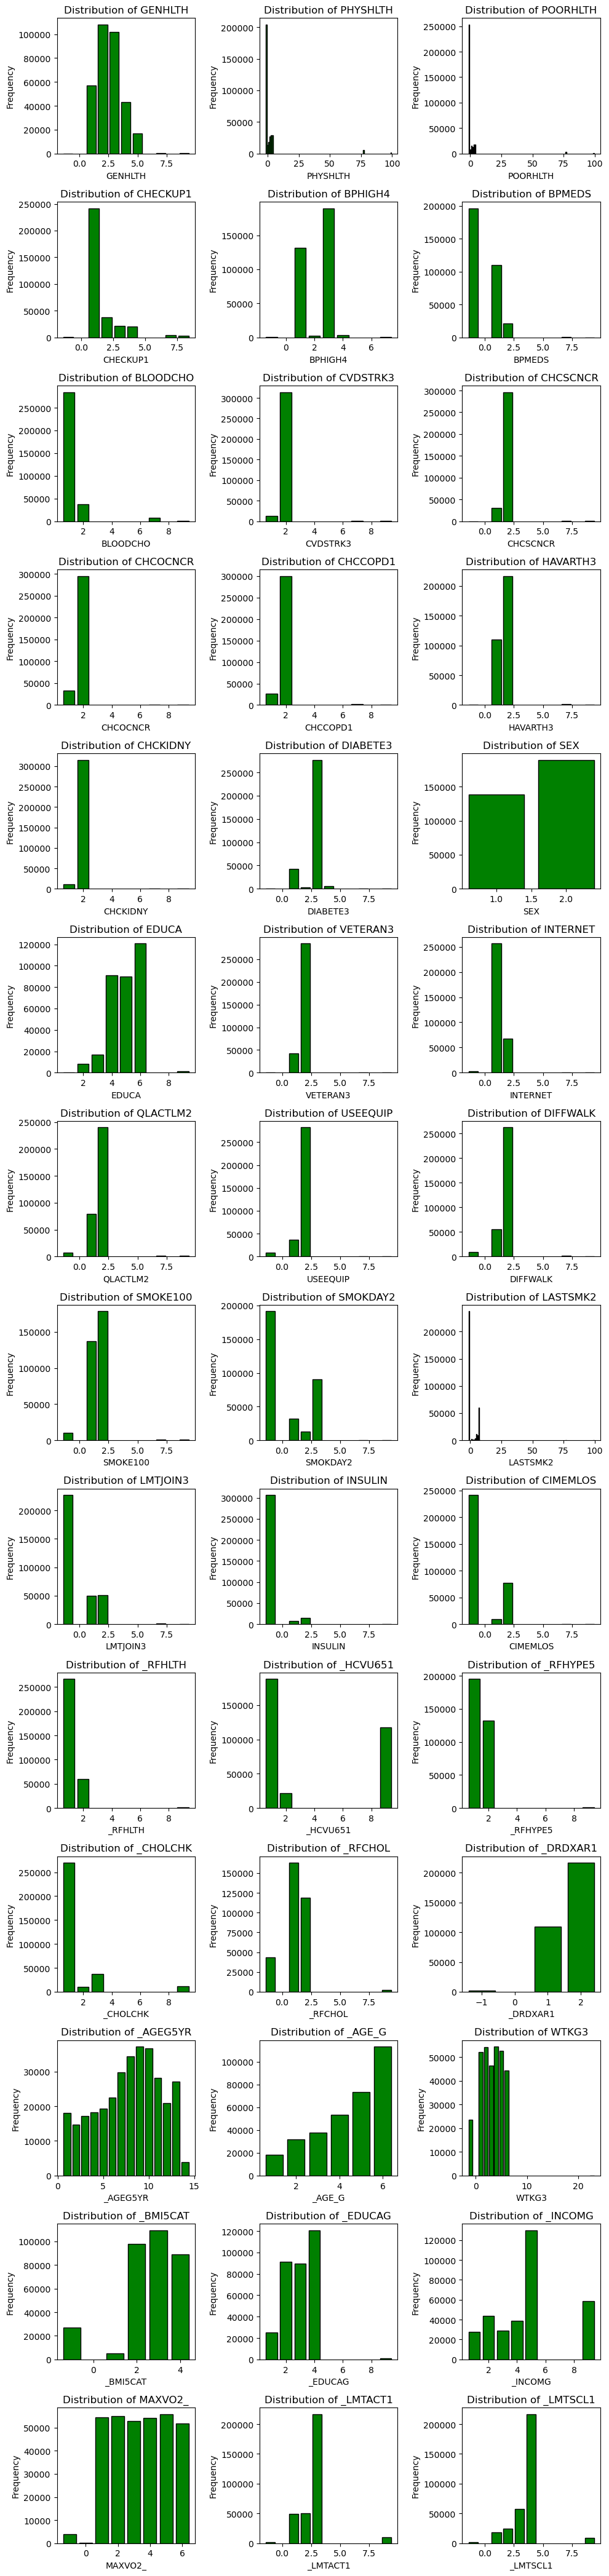

In [161]:
num_features = len(final_selected_features)
features_per_row = 3
num_rows = int(np.ceil(num_features / features_per_row))

plt.figure(figsize=(10, num_rows * 3))

for i, feature_name in enumerate(final_selected_features):
    plt.subplot(num_rows, features_per_row, i + 1)
    
    feature_values = x_train_final_filtered[:, i]
    
    unique_values, counts = np.unique(feature_values, return_counts=True)
    plt.bar(unique_values, counts, color='green', edgecolor='black')
    plt.xlabel(f'{feature_name}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature_name}')

plt.tight_layout()
plt.show()

#### Class imbalance

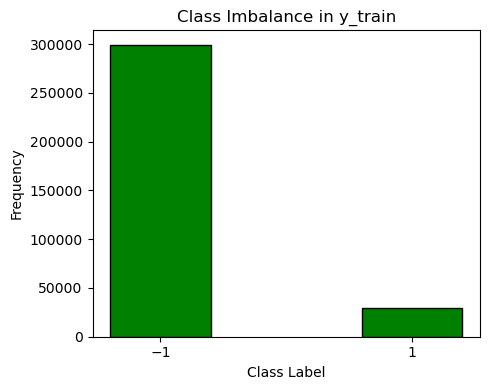

In [162]:
unique_classes, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(5, 4))
plt.bar(unique_classes, counts, color='green', edgecolor='black')
plt.xticks(unique_classes)
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Imbalance in y_train')
plt.tight_layout()
plt.show()

In [163]:
# oversampling and undersampling combined

def fix_class_imbalance(X, y, target_value=1, dont_balance=False):

    if dont_balance:
        return X, y

    # Separate samples by class
    class_1_indices = np.where(y == target_value)[0]
    class_minus_1_indices = np.where(y != target_value)[0]

    # Find class counts
    class_1_count = len(class_1_indices)
    class_minus_1_count = len(class_minus_1_indices)

    if class_1_count == class_minus_1_count:
        # If classes are already balanced, return the original data
        return X, y

    # Determine the number of samples to undersample and oversample
    if class_1_count < class_minus_1_count:
        minority_class_indices = class_1_indices
        majority_class_indices = class_minus_1_indices
    else:
        minority_class_indices = class_minus_1_indices
        majority_class_indices = class_1_indices

    minority_class_count = len(minority_class_indices)
    majority_class_count = len(majority_class_indices)

    # Undersample the majority class to half of its original size
    undersample_size = majority_class_count // 2
    undersampled_indices = np.random.choice(majority_class_indices, undersample_size, replace=False)

    # Oversample the minority class to match the undersampled majority class size
    oversample_size = undersample_size - minority_class_count
    oversampled_indices = np.random.choice(minority_class_indices, oversample_size, replace=True)

    # Combine all indices to create the balanced dataset
    new_indices = np.concatenate([undersampled_indices, minority_class_indices, oversampled_indices])
    X_balanced = X[new_indices]
    y_balanced = y[new_indices]

    return X_balanced, y_balanced


In [21]:
# from imblearn.over_sampling import SMOTE

# def fix_class_imbalance(X, y):
#     smote = SMOTE(random_state=42)
#     X_balanced, y_balanced = smote.fit_resample(X, y)
#     return X_balanced, y_balanced


In [22]:
# def fix_class_imbalance(X, y, target_value=1, dont_balance=False):
#     if dont_balance:
#         return X, y

#     # Separate samples by class
#     class_1_indices = np.where(y == target_value)[0]
#     class_minus_1_indices = np.where(y != target_value)[0]

#     # Find class counts
#     class_1_count = len(class_1_indices)
#     class_minus_1_count = len(class_minus_1_indices)

#     if class_1_count == class_minus_1_count:
#         # If classes are already balanced, return the original data
#         return X, y
#     elif class_1_count < class_minus_1_count:
#         # If class 1 is the minority, oversample class 1
#         oversample_size = class_minus_1_count - class_1_count
#         oversampled_indices = np.random.choice(class_1_indices, oversample_size, replace=True)
#     else:
#         # If class -1 is the minority, oversample class -1
#         oversample_size = class_1_count - class_minus_1_count
#         oversampled_indices = np.random.choice(class_minus_1_indices, oversample_size, replace=True)

#     # Create the balanced dataset
#     new_indices = np.concatenate([np.arange(len(y)), oversampled_indices])
#     X_balanced = X[new_indices]
#     y_balanced = y[new_indices]

#     return X_balanced, y_balanced


#### One-hot encoding

In [164]:
def one_hot_encode(x_train_final_filtered, final_selected_features):
    # Initialize an empty array with shape (n_samples, 0)
    x_train_filtered_2_OHE = np.zeros((x_train_final_filtered.shape[0], 0))
    
    # Iterate over the final selected features
    for i, feature in enumerate(final_selected_features):
        # Extract feature values for the current feature
        feature_values = x_train_final_filtered[:, i]
        
        # Get unique values for this feature
        unique_values = np.unique(feature_values)
        
        # One-hot encode by creating a column for each unique value
        for value in unique_values:
            one_hot_encoded_column = (feature_values == value).astype(int).reshape(-1, 1)
            x_train_filtered_2_OHE = np.hstack((x_train_filtered_2_OHE, one_hot_encoded_column))
    
    return x_train_filtered_2_OHE

# Apply the one-hot encoding to the final filtered data
x_train_filtered_2_OHE = one_hot_encode(x_train_final_filtered, final_selected_features)

# Print the shape and content of the one-hot encoded data
print("Shape of One-Hot Encoded Data:", x_train_filtered_2_OHE.shape)
print(x_train_filtered_2_OHE)

Shape of One-Hot Encoded Data: (328135, 233)
[[0. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]]


#### Label encoding

In [151]:
def label_encode(x_train, selected_features):
    # Create an empty array to store the encoded features
    x_train_encoded = np.zeros_like(x_train, dtype=int)

    # Iterate through each selected feature (column)
    for col in range(len(selected_features)):
        # Get unique values and assign a unique integer for each value
        unique_values, encoded_values = np.unique(x_train[:, col], return_inverse=True)
        
        # Assign the encoded values back to the training dataset for this column
        x_train_encoded[:, col] = encoded_values

    return x_train_encoded

# Apply the one-hot encoding to the final filtered data
x_train_filtered_2_OHE = label_encode(x_train_final_filtered, final_selected_features)

#### Data splitting

In [165]:
def split_data(x, y, ratio=0.8):
    indices = np.random.permutation(x.shape[0])
    train_indices = indices[:int(ratio * x.shape[0])]
    test_indices = indices[int(ratio * x.shape[0]):]
    return x[train_indices], y[train_indices], x[test_indices], y[test_indices]

y_train_mapped = (1 + y_train) / 2

x_train_filtered_2_OHE_train, y_train_train, x_train_filtered_2_OHE_test, y_train_test = split_data(x_train_filtered_2_OHE, y_train_mapped)

# Fix class imbalance in the training data
x_train_filtered_2_OHE_train_fixed, y_train_train_fixed = fix_class_imbalance(x_train_filtered_2_OHE_train, y_train_train)

print(x_train_filtered_2_OHE_train_fixed.shape)


(239332, 233)


In [166]:
from implementations import *

# Initialize the weights
initial_w = np.zeros(x_train_filtered_2_OHE_train_fixed.shape[1])
max_iters = 300
gamma = 0.2
lambda_ = 0.001

# Run the reg logistic regression
w, loss = reg_logistic_regression(y_train_train_fixed, x_train_filtered_2_OHE_train_fixed, lambda_,initial_w, max_iters, gamma)

Regularized Logistic Regression(0/299): loss=0.693147180559945, w0=-4.178296257917872e-07, w1=-0.007241405244597463
Regularized Logistic Regression(1/299): loss=0.650541341187849, w0=-8.157729900703069e-07, w1=-0.013248944924525743
Regularized Logistic Regression(2/299): loss=0.6198589301326739, w0=-1.210582526350341e-06, w1=-0.01864391567243133
Regularized Logistic Regression(3/299): loss=0.5970888099869539, w0=-1.6010619897759356e-06, w1=-0.023512523608902006
Regularized Logistic Regression(4/299): loss=0.579883151737486, w0=-1.9870939484246363e-06, w1=-0.027947592320783525
Regularized Logistic Regression(5/299): loss=0.5666305376140176, w0=-2.3686186839111963e-06, w1=-0.032022883382168695
Regularized Logistic Regression(6/299): loss=0.5562276696344409, w0=-2.7456438977438863e-06, w1=-0.0357972631556104
Regularized Logistic Regression(7/299): loss=0.5479135568052571, w0=-3.1182236444265733e-06, w1=-0.03931773932711733
Regularized Logistic Regression(8/299): loss=0.5411565785619309, w

In [168]:
def predict_logistic_regression(x, w):
    return np.array([1 if p > 0.5 else 0 for p in sigmoid(x @ w)])

# calculate the accuracy, precision, recall and F1 score
def accuracy_precision_recall_f1(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    return accuracy, precision, recall, f1

# Predict the values
y_pred_train = predict_logistic_regression(x_train_filtered_2_OHE_train, w)
y_pred_test = predict_logistic_regression(x_train_filtered_2_OHE_test, w)

print(y_pred_train)
# Calculate the metrics
accuracy_train, precision_train, recall_train, f1_train = accuracy_precision_recall_f1(y_train_train, y_pred_train)
accuracy_test, precision_test, recall_test, f1_test = accuracy_precision_recall_f1(y_train_test, y_pred_test)

print(f"Train accuracy: {accuracy_train}, precision: {precision_train}, recall: {recall_train}, F1: {f1_train}")
print(f"Test accuracy: {accuracy_test}, precision: {precision_test}, recall: {recall_test}, F1: {f1_test}")

[0 1 1 ... 0 1 0]
Train accuracy: 0.7616682158258034, precision: 0.24188052111457706, recall: 0.7962978943734899, F1: 0.37105173211090337
Test accuracy: 0.7631157907568531, precision: 0.24391781829646367, recall: 0.8004828418692878, F1: 0.3739025372533226


In [47]:
# Define ranges for hyperparameters
gamma_values = [0.01, 0.05, 0.1, 0.2]
lambda_values = [0.001, 0.01, 0.1, 1.0]
max_iters_values = [100, 200, 300]

# Initialize the best scores
best_f1 = 0
best_params = {}

# Grid search for hyperparameters
for gamma in gamma_values:
    for lambda_ in lambda_values:
        for max_iters in max_iters_values:
            # Initialize weights
            initial_w = np.zeros(x_train_filtered_2_OHE_train_fixed.shape[1])
            
            # Train the model
            w, loss = reg_logistic_regression(y_train_train_fixed, x_train_filtered_2_OHE_train_fixed, lambda_, initial_w, max_iters, gamma)
            
            # Predict on the training set
            y_pred_train = predict_logistic_regression(x_train_filtered_2_OHE_train_fixed, w)
            
            # Calculate metrics
            accuracy_train, precision_train, recall_train, f1_train = accuracy_precision_recall_f1(y_train_train_fixed, y_pred_train)
            
            # Update best parameters if current F1 is better
            if f1_train > best_f1:
                best_f1 = f1_train
                best_params = {
                    'gamma': gamma,
                    'lambda_': lambda_,
                    'max_iters': max_iters,
                    'weights': w
                }

# Output the best parameters and their performance
print("Best Hyperparameters:")
print(f"Gamma: {best_params['gamma']}, Lambda: {best_params['lambda_']}, Max Iterations: {best_params['max_iters']}")
print(f"Best F1 Score: {best_f1}")

# Use the best model to predict on the test set
y_pred_test = predict_logistic_regression(x_train_filtered_2_OHE_test, best_params['weights'])
accuracy_test, precision_test, recall_test, f1_test = accuracy_precision_recall_f1(y_train_test, y_pred_test)

# Output test set metrics
print(f"Test accuracy: {accuracy_test}, precision: {precision_test}, recall: {recall_test}, F1: {f1_test}")


Regularized Logistic Regression(0/99): loss=0.693147180559945, w0=-2.0882930292778682e-08, w1=-0.0003658898216597753
Regularized Logistic Regression(1/99): loss=0.6915628293745325, w0=-4.175923720895427e-08, w1=-0.000730102395178145
Regularized Logistic Regression(2/99): loss=0.6899957981779016, w0=-6.262909288195137e-08, w1=-0.0010926514057654493
Regularized Logistic Regression(3/99): loss=0.6884458801425628, w0=-8.349266532654935e-08, w1=-0.0014535504305981206
Regularized Logistic Regression(4/99): loss=0.6869128708237278, w0=-1.043501185193014e-07, w1=-0.0018128129384149471
Regularized Logistic Regression(5/99): loss=0.6853965681381441, w0=-1.2520161247790592e-07, w1=-0.0021704522891827344
Regularized Logistic Regression(6/99): loss=0.6838967723428875, w0=-1.460473033395218e-07, w1=-0.0025264817338291525
Regularized Logistic Regression(7/99): loss=0.6824132860141098, w0=-1.668873434380203e-07, w1=-0.002880914414039203
Regularized Logistic Regression(8/99): loss=0.6809459140257669, w

### Tests with different models

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(x_train_filtered_2_OHE_train_fixed, y_train_train_fixed)

# Predict on the test set
y_pred_test_rf = rf_model.predict(x_train_filtered_2_OHE_test)

# Calculate and print the test metrics
accuracy_test_rf = accuracy_score(y_train_test, y_pred_test_rf)
precision_test_rf = precision_score(y_train_test, y_pred_test_rf)
recall_test_rf = recall_score(y_train_test, y_pred_test_rf)
f1_test_rf = f1_score(y_train_test, y_pred_test_rf)

print(f"Random Forest Test accuracy: {accuracy_test_rf}, precision: {precision_test_rf}, recall: {recall_test_rf}, F1: {f1_test_rf}")


NameError: name 'x_train_filtered_2_OHE_train_fixed' is not defined

In [29]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(x_train_filtered_2_OHE_train_fixed, y_train_train_fixed)

# Predict on the test set
y_pred_test_knn = knn_model.predict(x_train_filtered_2_OHE_test)

# Calculate metrics
accuracy_test_knn = accuracy_score(y_train_test, y_pred_test_knn)
precision_test_knn = precision_score(y_train_test, y_pred_test_knn)
recall_test_knn = recall_score(y_train_test, y_pred_test_knn)
f1_test_knn = f1_score(y_train_test, y_pred_test_knn)

print(f"KNN Test accuracy: {accuracy_test_knn}, precision: {precision_test_knn}, recall: {recall_test_knn}, F1: {f1_test_knn}")

KNN Test accuracy: 0.8674630868392582, precision: 0.24405506883604505, recall: 0.23393316195372751, F1: 0.23888694434721736
